In [1]:
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
load_dotenv()


username = os.getenv('KAGGLE_USERNAME')
kaggle_key = os.getenv('KAGGLE_KEY')
if not username or not kaggle_key:
    raise ValueError("Kaggle credentials missing in your .env file!")
else:
    print("Kaggle credentials loaded successfully!")

Kaggle credentials loaded successfully!


In [2]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
import pandas as pd
import zipfile

with zipfile.ZipFile("insurance.zip") as z:
    print("Files in zip:", z.namelist())
    with z.open("insurance.csv") as i:
        i = z.open("insurance.csv")
        df = pd.read_csv(i)
print(df.head(5))

Files in zip: ['insurance.csv']
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
with zipfile.ZipFile("insurance.zip") as z:
    print("Files in zip:", z.namelist())
    x = z.open("insurance.csv")
df = pd.read_csv(x)
print(df.head())

Files in zip: ['insurance.csv']
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
data = pd.DataFrame(df)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# One-hot encode categorical columns
data_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# Define features and target
x = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

In [8]:
lr = LinearRegression()
lr.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
pred = lr.predict(x)
print(pred)

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]


In [10]:
print(f'intercept: {lr.intercept_}')
print(f'coefficient: {lr.coef_}')

intercept: -11938.538576167142
coefficient: [  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


In [12]:
mse = mean_squared_error(y,pred)
print(f'MSE:{mse}')

mae = mean_absolute_error(y,pred)
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(y,pred))
print(f'rMSE: {rmse}')

r2 = r2_score(y, pred)
print(f'R² Score: {r2}')


MSE:36501893.00741544
MAE: 4170.8868941635865
rMSE: 6041.6796511744515
R² Score: 0.7509130345985207


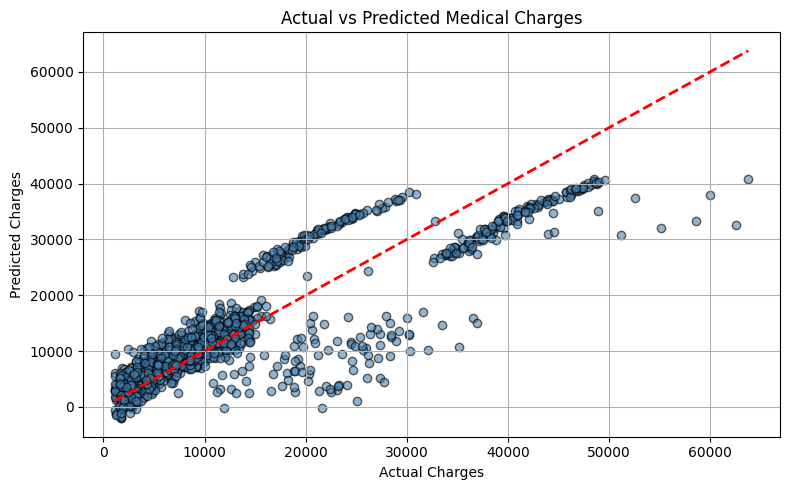

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Actual vs Predicted Charges
plt.figure(figsize=(8, 5))
plt.scatter(y, pred, alpha=0.6, color='steelblue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19016\2069704899.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


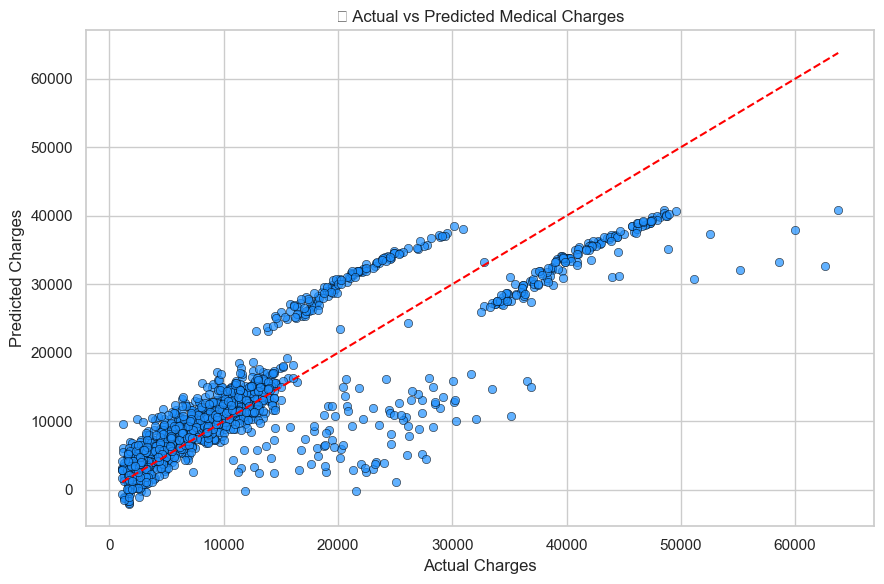

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Visualization: Actual vs Predicted Charges
plt.figure(figsize=(9, 6))
sns.scatterplot(x=y, y=pred, color="dodgerblue", edgecolor="black", alpha=0.7)
sns.lineplot(x=y, y=y, color="red", linestyle='--')  # ideal line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("📊 Actual vs Predicted Medical Charges")
plt.tight_layout()
plt.show()
